# DB 02 Many to one relationships 01

## Many to one relationships

### 모델 관계

#### Many to one relationships
N : 1 or 1 : N
- 한 테이블의 0개 이상의 레코드가 다른 테이블의 레코드 한 개와 관련된 관계

#### Comment(N) - Article(1)
0개 이상의 댓글은 1개의 게시글에 작성될 수 있다

#### 테이블의 관계
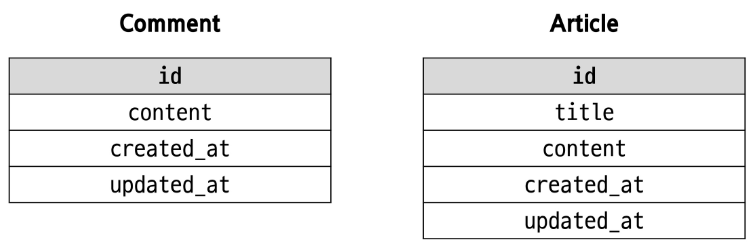

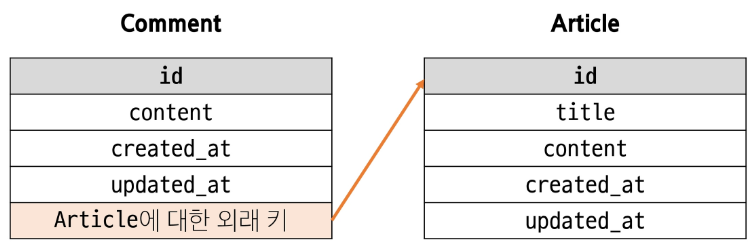

### 댓글 모델 정의

#### ForeignKey()
한 모델이 다른 모델을 참조하는 관계를 설정하는 필드
- > N : 1관계 표현
- > 데이터베이스에서 외래 키로 구현

#### 댓글 모델 정의
- ForeingKey 클래스의 인스턴스 이름은 참조하는 모델 클래스 이름의 `단수형`으로 작성하는 것을 권장
- 외래 키는 ForeignKey 클래스를 작성하는 위치와 관계없이 테이블의 마지막 필드로 생성됨

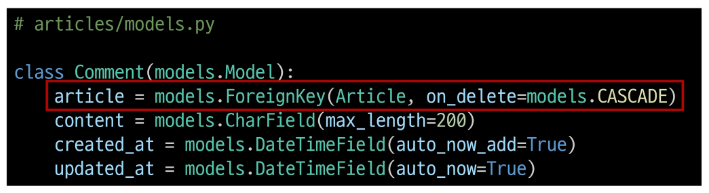

#### ForeignKey(to, on_delete)
- to
    - 참조하는 class 이름
- on_delete
    - 외래 키가 참조하는 객체(1)가 사라졌을 때, 외래 키를 가진 객체(N)를 어떻게 처리할 지를 정의하는 설정 (데이터 무결성)

#### on_delete의 `CASCADE`
- 참조된 객체(부모 객체)가 삭제될 때 이를 참조하는 모든 객체도 삭제되도록 지정

- > 기타 on_delete 설정 값 참고
    - 

#### Migration 이후 댓글 테이블 확인
- 댓글 테이블의 article_id 외래 키 필드 확인
- 만들어지는 필드 이름
    - `참조 대상 클래스 이름` + `_` + `id`
- > 참조하는 클래스 이름의 소문자(단수형)로 작성하는 것이 권장되었던 이유

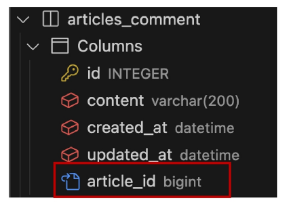

### 댓글 생성 연습
shell_plus 실행 및 게시글 작성

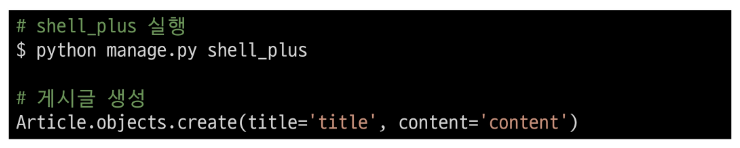

댓글 생성

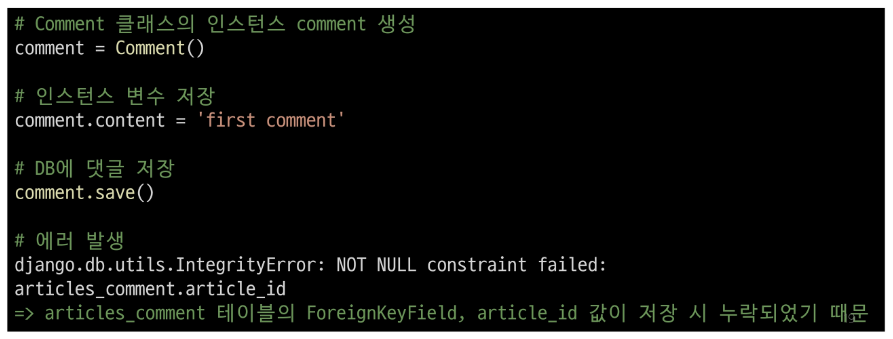

shell_plus 실행 및 게시글 작성

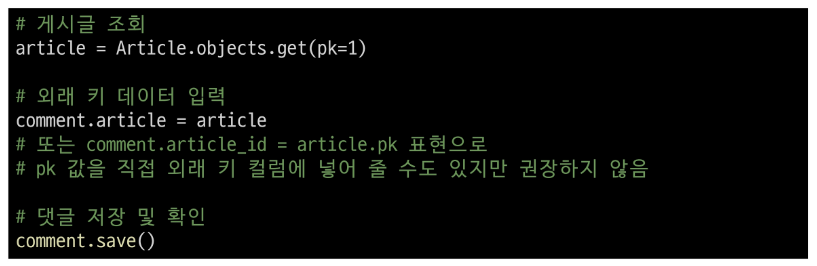

comment 인스턴스를 통한 article 값 참조하기

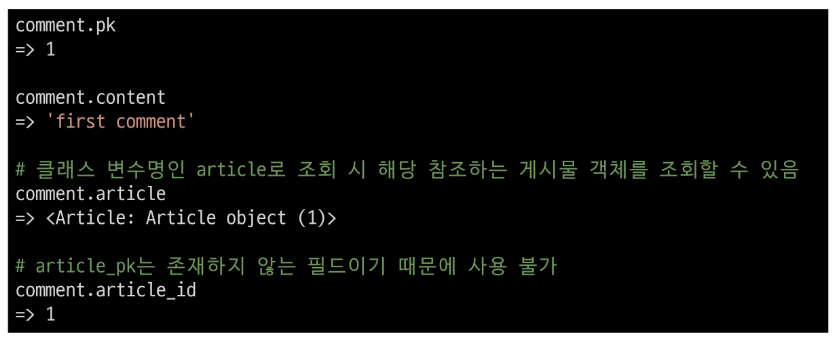

comment 인스턴스를 통한 article 값 참조하기

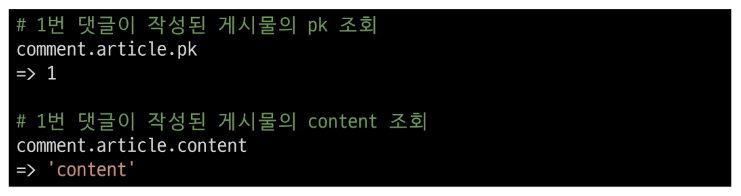

두번째 댓글 생성

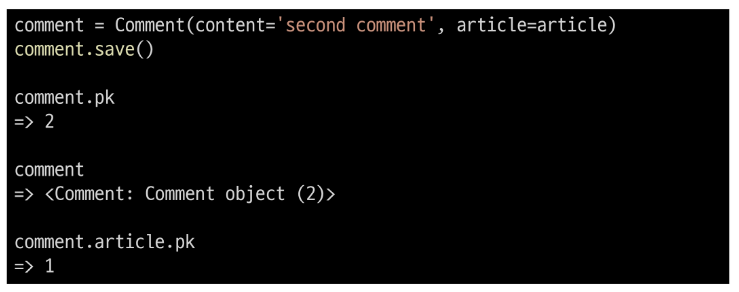

작성된 댓글 데이터 확인

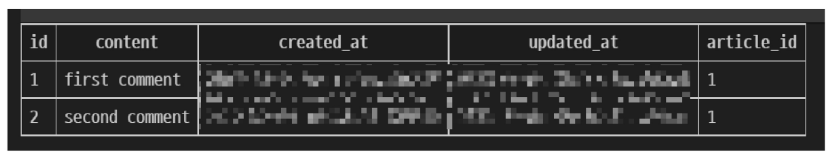

## 관계 모델 참조

### 역참조

#### 역참조
- N : 1 관계에서 1에서 N을 참조하거나 조회하는 것 (1 > N)
- 모델 간의 관계에서 관계를 정의한 모델이 아닌, 관계의 대상이 되는 모델에서 연결된 객체들에 접근하는 방식
- > N은 외래 키를 가지고 있어 물리적으로 참조가 가능하지만, 1은 N에 대한 참조 방법이 존재하지 않아 별도의 역참조 키워드가 필요

#### 역참조 사용 예시
<h3>article.comment_set.all()</h3>
article : 모델 인스턴스<br>
comment_set : related manager(역참조 이름)
all() : QuerySet API

- > 특정 게시글에 작성된 댓글 전체를 조회하는 요청

#### related manager
N : 1 혹은 M : N 관계에서 역참조 시에 사용하는 매니저

- > `objects` 매니저를 통해 QuerySet API를 사용했던 것처럼 related manager를 통해 QuerySet API를 사용할 수 있게 됨

#### related manager 이름 규칙
- N : 1 관계에서 생성되는 Related manager의 이름은 `모델명_set` 형태로 자동 생성됨
    - 관계를 직접 정의하지 않은 모델에서 연결된 객체들을 조히할 수 있게 함
- 특정 댓글 게시글 참조 (Commnet > Aritcle)
    - comment.article
- 특정 게시글의 댓글 목록 참조 (Article > Comment)
    - article.comment_set.all()

#### related manager 연습
- shell_plus 실행 및 1번 게시글 조회

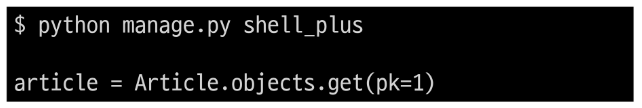
- 1번 게시글에 작성된 모든 댓글 조회하기 (역참조)

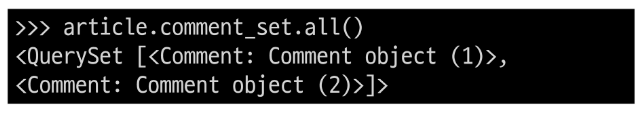

- 1번 게시글에 작성된 모든 댓글 내용 출력
  
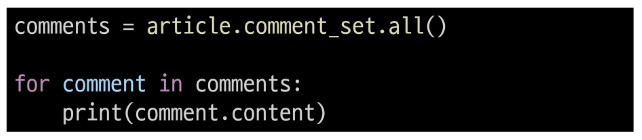

## 댓글 구현

### 댓글 CREATE

#### 댓글 CREATE 구현 1
사용자로부터 댓글 데이터를 입력 받기 위한 CommentForm 정의

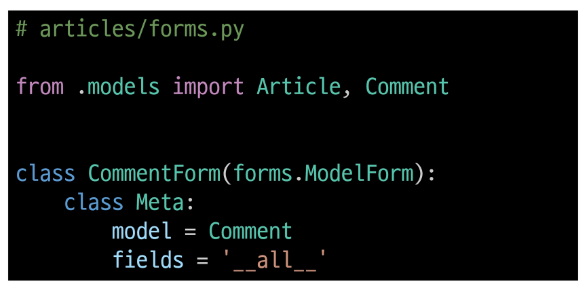

detail view 함수에서 CommentForm을 사용하여 detail 페이지에 렌더링

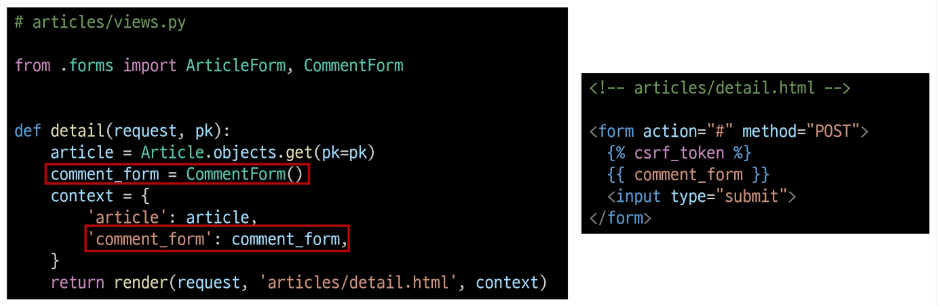

- Commnet 클래스의 외래 키 필드 article 또한 데이터 입력이 필요한 필드이기 때문에 출력 되는 것
- 하지만, 외래 키 필드 데이터는 `사용자로부터 입력받는 값이 아닌 view함수 내에서 다른 방법으로 전달받아 저장`되어야 함

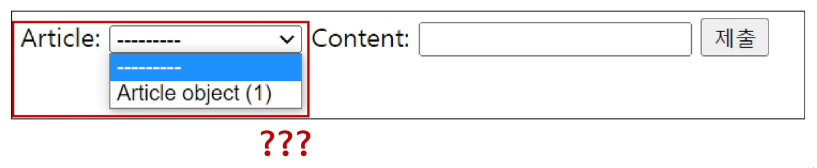

CommentForm의 출력 필드를 조정하여 외래 키 필드가 출력되지 않도록 함

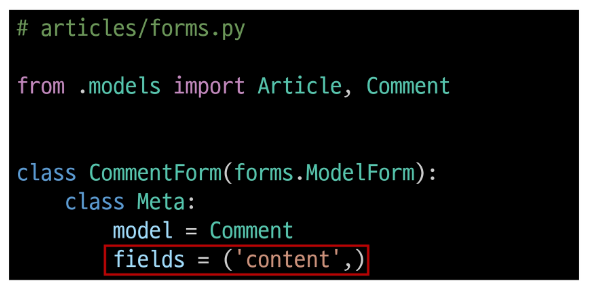

- 출력에서 제외된 외래 키 데이터는 어디서 받아와야 할까?
- detail 페이지의 URL을 살펴보면
- path('<int:pk>/', views.detail, name='detail')에서 해당 게시글의 pk 값이 사용되고 있음
- 댓글의 외래 키 데이터에 필요한 정보가 바로 게시글의 pk 값

url 작성 및 action 값 작성

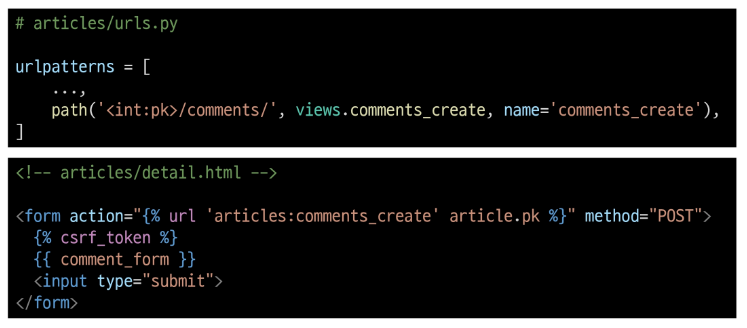

**comments_create** view 함수 정의
- > url로 받은 pk 인자를 게시글을 조회하는 데 사용

#### save(`commit=False`)
DB에 저장 요청을 보내지 않고 인스턴스만 반환
(Create, but don'save the new instance.)

#### 댓글 CREATE 구현 2
save의 commit 인자를 활용해 외래 키 데이터 추가 입력

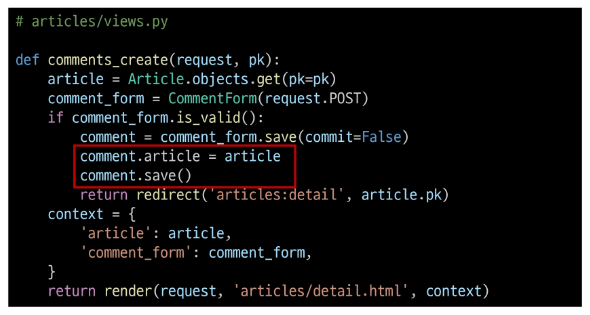

댓글 작성 후 테이블 확인
                   
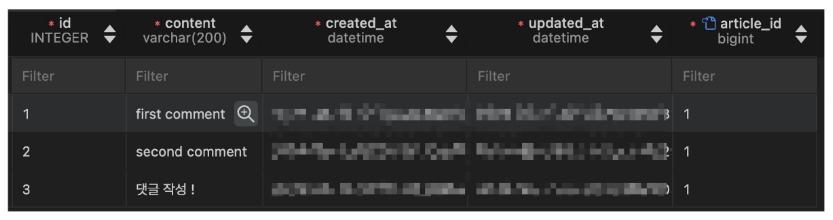

### 댓글 READ

#### 댓글 READ 구현
detail view 함수에서 전체 댓글 데이터를 조회

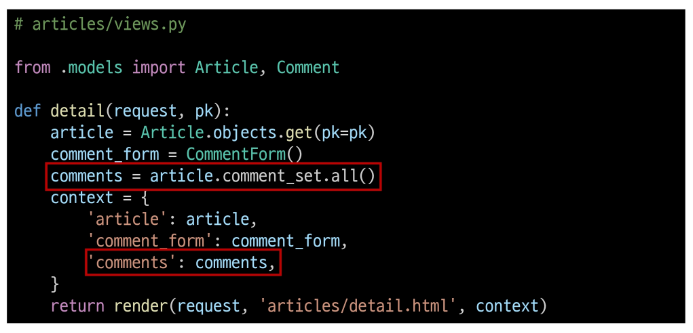

전체 댓글 출력 및 확인

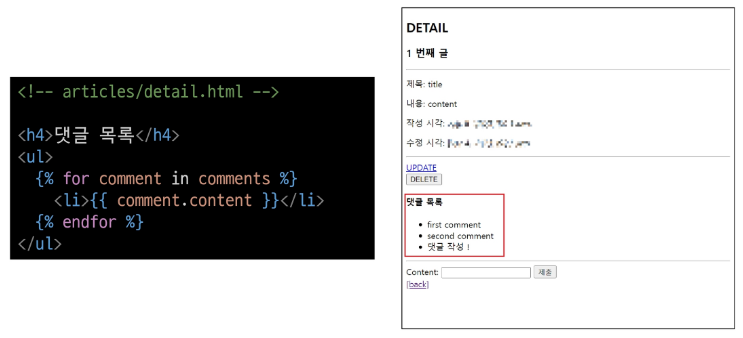

### 댓글 DELETE

#### 댓글 DELETE 구현
댓글 삭제 url 작성

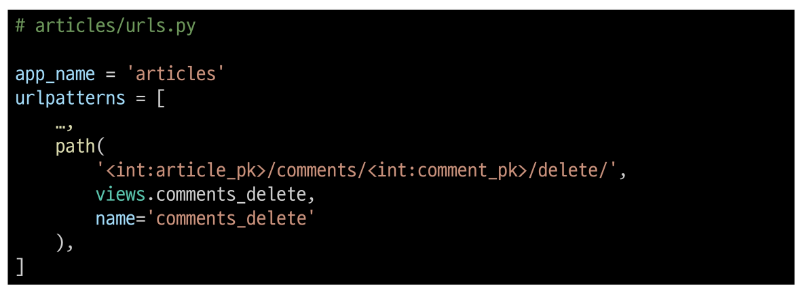

댓글 삭제 view 함수 정의

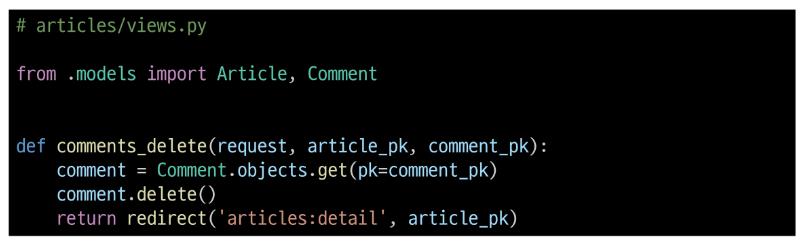

댓글 삭제 버튼 작성

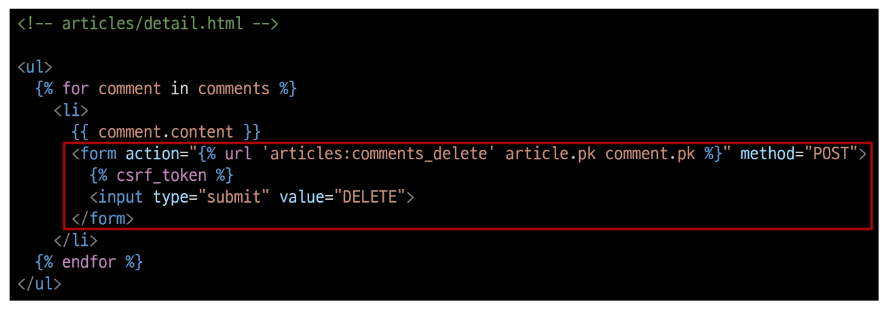

댓글 삭제 버튼 출력 확인 및 삭제 테스트

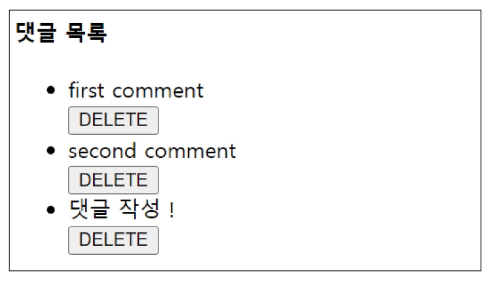

## 참고

### 데이터 무결성
- 데이터베이스에 저장된 데이터의 정확성, 일관성, 유효성을 유지하는 것
- 데이터베이스에 저장된 데이터 값의 정확성을 보장하는 것
- > 중요성
    1. 데이터의 신뢰성 확보
    2. 시스템 안정성
    3. 보안 강화

### admin site 댓글 등록

### admin site 등록
Comment  모델을 admin site에 등록해 CRUD 동작 확인하기

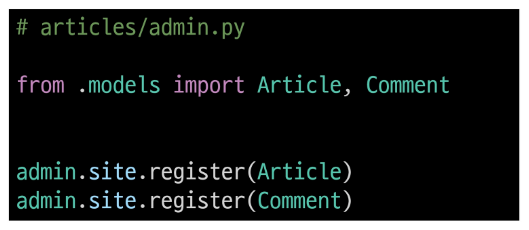

### 댓글 추가 구현

### 1. 댓글이 없는 경우 대체 콘텐츠 출력
DTL의 `for empty` 태그 활용

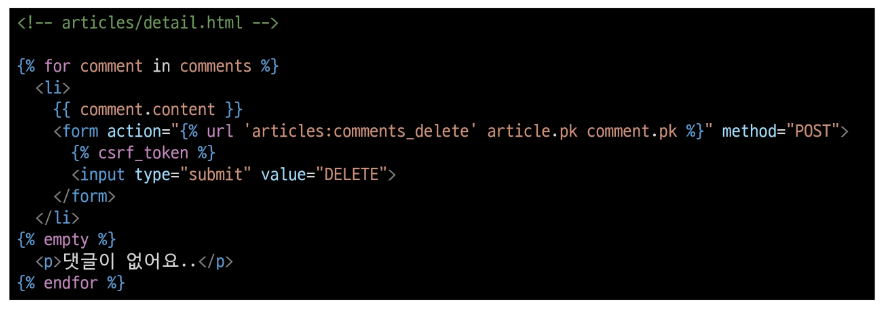

### 2. 댓글 갯수 출력하기
- DTL filter -  'length' 사용

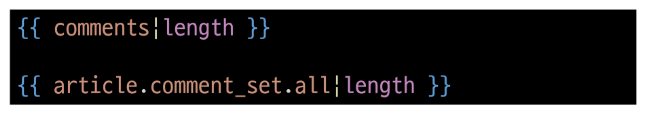

- QuerySet API - 'count()' 사용

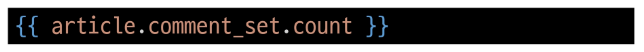

# DB 02 Many to one relationships 02